In [1]:
%matplotlib inline
from mpmath import mpf, mp, pi
import gmpy2
from gmpy2 import mpz
from PIL import Image
import numpy as np
import math 
import random
import cv2
import matplotlib
from matplotlib import pyplot as plt
# import plotly.graph_objects as go
# import plotly.offline as pyo
from functools import reduce
from operator import concat
from sklearn.preprocessing import normalize

/home/sbenstewart/anaconda3/envs/skoda/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.16.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
scale = 1
width = 1200*scale
height = 1200*scale
dpi = 300

In [3]:
hex_length_per_pixel = 6
total_pixels = width * height
length = (total_pixels)*hex_length_per_pixel

In [4]:
l = []

In [5]:
hex_length_per_row = width*hex_length_per_pixel

In [6]:
colours = [(66, 189, 59),(230, 230, 230),(152, 162, 167),(20, 20, 20),(0,0,0)]

In [7]:
for row_index in range(0, length, hex_length_per_row):
    row = []
    for column_index in range(0, width):
        pixel = []
        row.append(random.choice(colours))
    l.insert(int(row_index/hex_length_per_row), row)

In [8]:
#pixel

In [9]:
#row

In [10]:
#l

In [11]:
print('The resolution is '+str(len(l[0]))+' X '+str(len(l)))

The resolution is 1200 X 1200


In [12]:
# Convert the pixels into an array using numpy
array = np.array(l, dtype=np.uint8)

# Use PIL to create an image from the new array of pixels
new_image = Image.fromarray(array)
new_image.save("camo-bg.jpeg", "JPEG", quality=100, optimize=False, progressive=True)

In [13]:
open_cv_image = np.array(new_image) 
# Convert RGB to BGR 
open_cv_image = open_cv_image[:, :, ::-1].copy() 
open_cv_image_bg = open_cv_image

In [14]:
mp.dps = 50
%time pi = mpf(pi)
pi = str(pi)

CPU times: user 85 µs, sys: 4 µs, total: 89 µs
Wall time: 93.5 µs


In [15]:
random.seed(pi)

In [16]:
circles = []
rectangles = []
triangles = []

In [17]:
for i in range(600):
    choice = int(random.randint(0,2))
    colour = random.choice(colours)[::-1]
    if choice == 0:
        center_coordinates = (random.randint(1,1200)*scale, random.randint(1,1200)*scale)
        radius = random.randint(35,55)*scale
        thickness = random.randint(5,15)*scale
        open_cv_image = cv2.circle(open_cv_image, center_coordinates, radius, colour, thickness)
        circles.append([center_coordinates[0],center_coordinates[1],radius,radius,thickness,colour])
    elif choice == 1:
        start_point = (random.randint(-1200/2,1200)*scale, random.randint(-1200/2,1200)*scale)
        dimensions = (random.randint(100,1200/2)*scale, random.randint(100,1200)/2*scale)
        thickness = random.randint(5,15)*scale
        end_point = tuple(map(lambda x, y: int(x + y), start_point, dimensions))
        open_cv_image = cv2.rectangle(open_cv_image, start_point, end_point, colour, thickness)
        rectangles.append([start_point[0]+dimensions[0]/2,start_point[1]+dimensions[1]/2,dimensions[0]/2,dimensions[1]/2,thickness,colour])
    else:
        point_1 = (random.randint(-1200/2,1200)*scale, random.randint(-1200/2,1200)*scale)
        dimensions = (random.randint(100,1200/2)*scale, random.randint(100,1200)/2*scale)
        point_2 = (point_1[0],int(point_1[1]+dimensions[1]))
        X, Y = np.array([point_1]), np.array([point_2])
        M = (X + Y) / 2
        O = (X - M) * 3**0.5
        t = np.array([[0, -1], [1, 0]]) 
        point_3 = M + O @ t
        point_3 = tuple(point_3.reshape(1, -1)[0])
        point_3 = tuple((int(point_3[0]),int(point_3[1])))
        pts = [point_1, point_2, point_3]
        thickness = random.randint(5,6)*scale
        open_cv_image = cv2.polylines(open_cv_image, np.array([pts]), True, colour, thickness)
        triangles.append([(point_1[0]+point_2[0]+point_3[0])/3,(point_1[1]+point_2[1]+point_3[1])/3,dimensions[0]/2,dimensions[1]/2,thickness,colour])

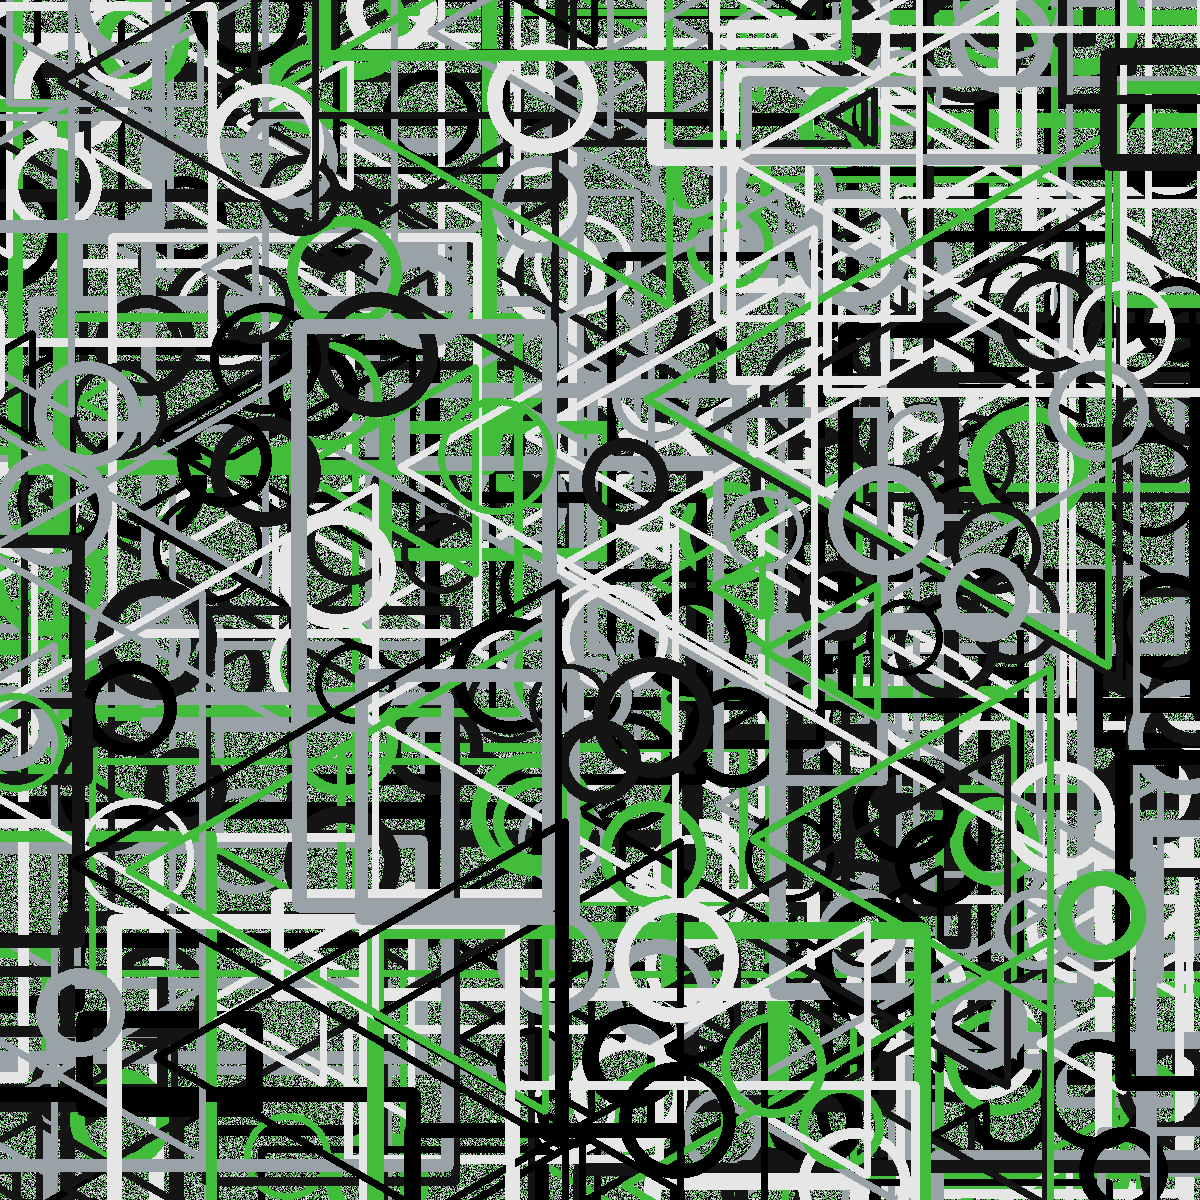

In [18]:
open_cv_image = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2RGB)
pil_image = Image.fromarray(open_cv_image)
pil_image.save("camo.jpeg", "JPEG", quality=100, optimize=False, progressive=True)
pil_image

In [19]:
pil_image.save('camo.eps', lossless = True)

In [20]:
circles

[[377, 300, 55, 55, 8, (20, 20, 20)],
 [630, 315, 54, 54, 11, (20, 20, 20)],
 [539, 451, 48, 48, 15, (59, 189, 66)],
 [1159, 729, 44, 44, 13, (0, 0, 0)],
 [610, 412, 51, 51, 14, (20, 20, 20)],
 [112, 171, 54, 54, 14, (167, 162, 152)],
 [338, 301, 49, 49, 7, (0, 0, 0)],
 [922, 1200, 50, 50, 6, (0, 0, 0)],
 [873, 1112, 51, 51, 9, (0, 0, 0)],
 [923, 460, 55, 55, 5, (20, 20, 20)],
 [210, 543, 54, 54, 10, (230, 230, 230)],
 [1009, 1110, 38, 38, 12, (0, 0, 0)],
 [874, 514, 48, 48, 9, (0, 0, 0)],
 [218, 672, 40, 40, 14, (20, 20, 20)],
 [519, 501, 43, 43, 10, (167, 162, 152)],
 [896, 916, 47, 47, 14, (167, 162, 152)],
 [806, 821, 46, 46, 11, (20, 20, 20)],
 [377, 1181, 44, 44, 14, (59, 189, 66)],
 [156, 995, 45, 45, 12, (20, 20, 20)],
 [700, 375, 37, 37, 7, (0, 0, 0)],
 [995, 23, 39, 39, 7, (59, 189, 66)],
 [923, 503, 37, 37, 6, (0, 0, 0)],
 [184, 218, 37, 37, 9, (0, 0, 0)],
 [210, 308, 40, 40, 12, (20, 20, 20)],
 [653, 484, 55, 55, 13, (230, 230, 230)],
 [1155, 141, 46, 46, 15, (0, 0, 0)],
 [

In [21]:
circle = [ sum(row[i] for row in circles)/len(circles) for i in range(len(circles[0])-1) ]
colours = list(zip(*circles))[-1]
circle.extend([ int(sum(row[i] for row in colours)/len(colours)) for i in range(len(colours[0])) ])
circle

[645.2394366197183,
 587.5727699530516,
 44.7887323943662,
 44.7887323943662,
 10.173708920187794,
 86,
 104,
 84]

In [22]:
rectangle = [ sum(row[i] for row in rectangles)/len(rectangles) for i in range(len(rectangles[0])-1) ]
colours = list(zip(*rectangles))[-1]
rectangle.extend([ int(sum(row[i] for row in colours)/len(colours)) for i in range(len(colours[0])) ])
#rectangle

In [23]:
triangle = [ sum(row[i] for row in triangles)/len(triangles) for i in range(len(triangles[0])-1) ]
colours = list(zip(*triangles))[-1]
triangle.extend([ int(sum(row[i] for row in colours)/len(colours)) for i in range(len(colours[0])) ])
#triangle

In [24]:
analysis = []
analysis.append(circle)
analysis.append(rectangle)
analysis.append(triangle)
#analysis

In [25]:
def radar_plot(analysis):
    categories = ['x-coords', 'y-coords', 'height', 'width', 'thickness','red','green','blue']
    categories = [*categories, categories[0]]


    circle = [*analysis[0], analysis[0][0]]
    rectangle = [*analysis[1], analysis[1][0]]
    triangle = [*analysis[2], analysis[2][0]]


    label_loc = np.linspace(start=0, stop=2* np.pi, num=len(circle))

    plt.figure(figsize=(15,15))
    ax = plt.subplot(polar=True)

    ax.fill(label_loc, circle, 'c', alpha=0.2)
    ax.fill(label_loc, rectangle, 'r', alpha=0.2)
    ax.fill(label_loc, triangle, 'b', alpha=0.2)


    plt.plot(label_loc, circle, label='Circle', linewidth=3)
    plt.plot(label_loc, rectangle, label='Rectangle', linewidth=3)
    plt.plot(label_loc, triangle, label='Triangle', linewidth=3)

    plt.title('Shapes', size=20, y=1.05)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
    plt.legend()
    plt.show()

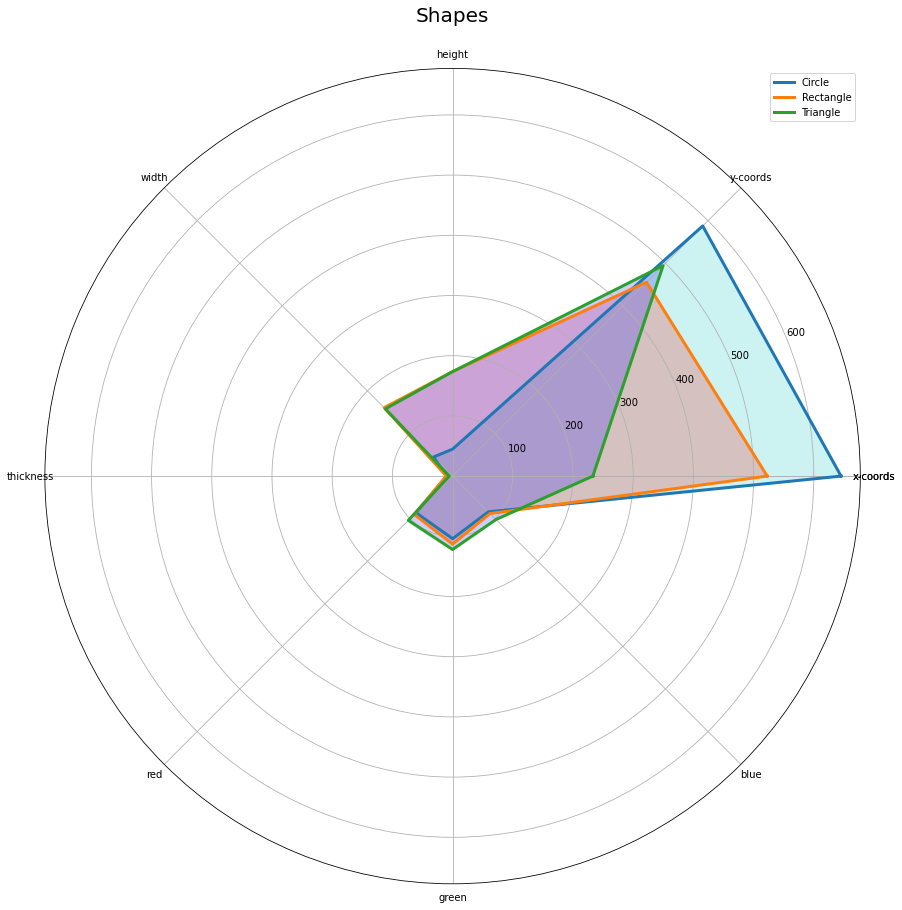

In [26]:
radar_plot(analysis)

In [27]:
t_analysis = [list(i) for i in zip(*analysis)]
#t_analysis

In [28]:
normalised_t_analysis = normalize(t_analysis, axis=1, norm='l1')
#normalised_t_analysis

In [29]:
normalised_analysis = [list(i) for i in zip(*normalised_t_analysis)]
#normalised_analysis

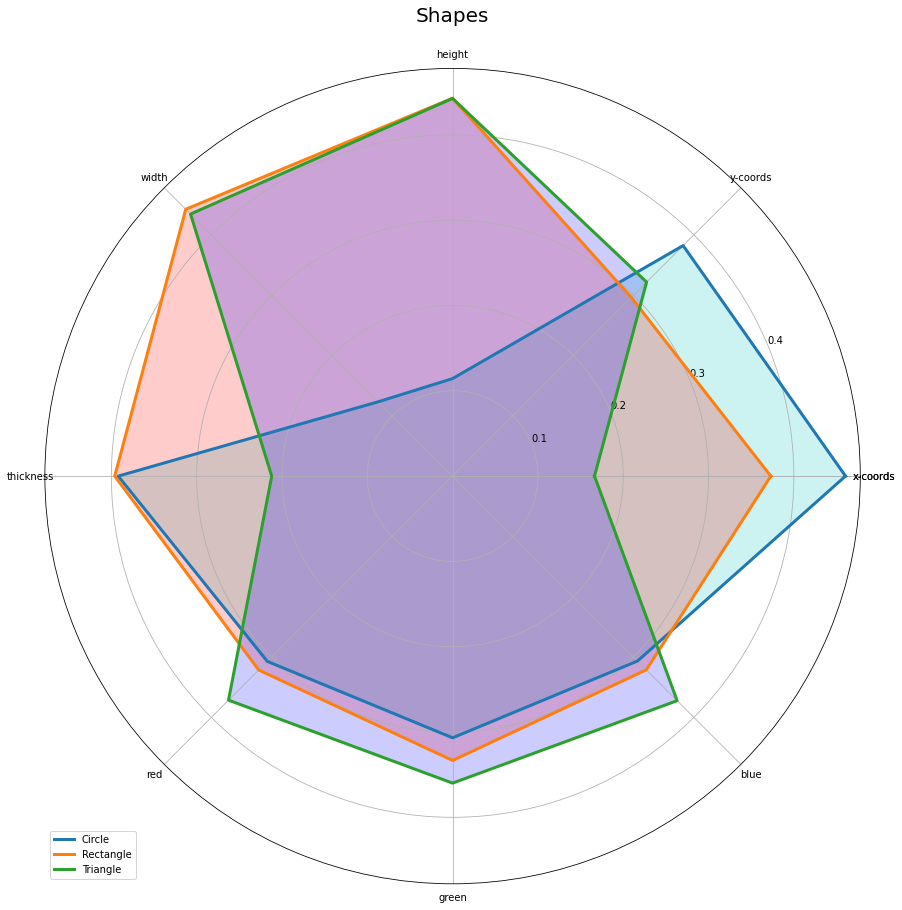

In [30]:
radar_plot(normalised_analysis)

In [63]:
open_cv_image = np.array(new_image) 
# Convert RGB to BGR 
open_cv_image = open_cv_image[:, :, ::-1].copy() 
open_cv_image_bg = open_cv_image

In [64]:
circle = list(map(int, circle))
rectangle = list(map(int, rectangle))
triangle = list(map(int, triangle))

In [72]:
open_cv_image = cv2.circle(open_cv_image, (circle[0],circle[1]), circle[2], (circle[5],circle[6],circle[7]), circle[4])
open_cv_image = cv2.rectangle(open_cv_image, (int(rectangle[0]-rectangle[2]/2),int(rectangle[1]-rectangle[3]/2)), (int(rectangle[0]+rectangle[2]/2),int(rectangle[1]+rectangle[3]/2)), (rectangle[5],rectangle[6],rectangle[7]), rectangle[4])
pts = 
open_cv_image = cv2.polylines(open_cv_image, np.array([pts]), True, (triangle[5],triangle[6],triangle[7]), triangle[4])

error: OpenCV(4.5.3) /tmp/pip-req-build-afu9cjzs/opencv/modules/imgproc/src/drawing.cpp:2427: error: (-215:Assertion failed) p.checkVector(2, CV_32S) >= 0 in function 'polylines'


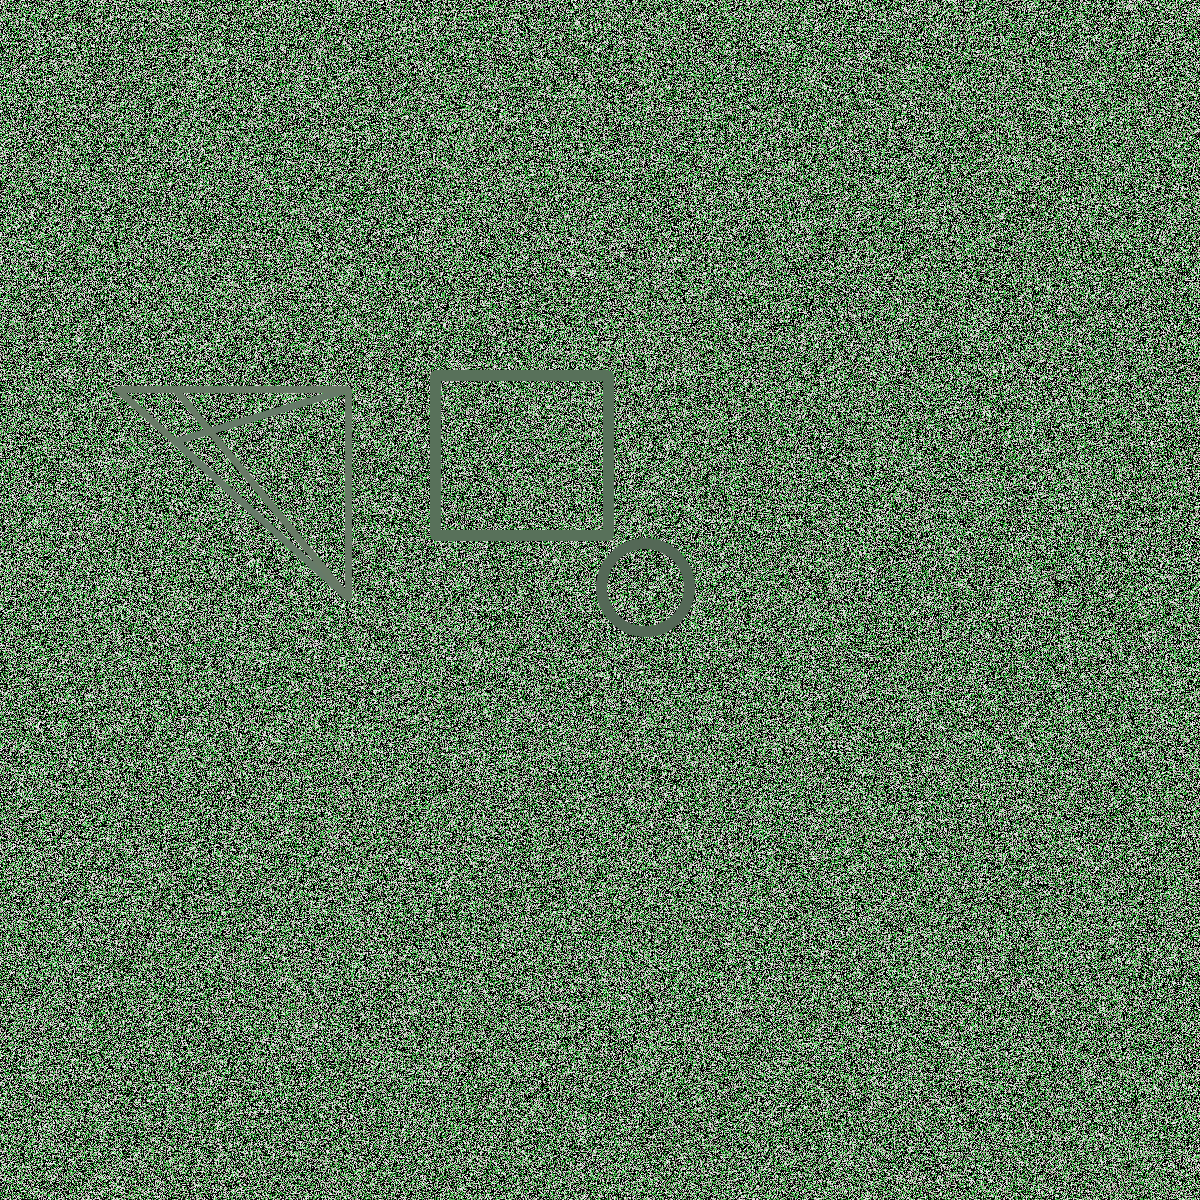

In [73]:
open_cv_image = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2RGB)
pil_image = Image.fromarray(open_cv_image)
pil_image.save("camo.jpeg", "JPEG", quality=100, optimize=False, progressive=True)
pil_image

In [43]:
pts

[(565, 821), (565, 1293), (156, 1057)]

In [71]:
[(int(triangle[0]-triangle[2]/3),int((int(triangle[1]+2*triangle[3]/3)+int(triangle[1]-2*triangle[3]/3))/2)),(int(triangle[0]+2*triangle[2]/3),int(triangle[1]+2*triangle[3]/3)),(int(triangle[0]+2*triangle[2]/3),int(triangle[1]-2*triangle[3]/3))]

[(175, 493.5), (348, 598), (348, 389)]

In [76]:
int((int(triangle[1]+2*triangle[3]/3)+int(triangle[1]-2*triangle[3]/3))/2)

493